Enter the first material sheet name: Ti
Enter the second material sheet name: Al
Enter the temperature (in K): 334.15


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Actual Material Properties at 334.15K:
Band Gap (eV): 0.000000
Young Module (GPa): 84.811949
Density (g/cm3): 3.528597
Energy Absorption (KJ/m3): 5777.869528
Thermal Conductivity (W/m.K): 85.860227
Specific Heat (J/g.C): 0.731348

Predicted Material Properties (with noise) at 334.15K:
Band Gap (eV): -0.015110
Young Module (GPa): 84.949209
Density (g/cm3): 3.520285
Energy Absorption (KJ/m3): 5817.246489
Thermal Conductivity (W/m.K): 85.843841
Specific Heat (J/g.C): 0.721269


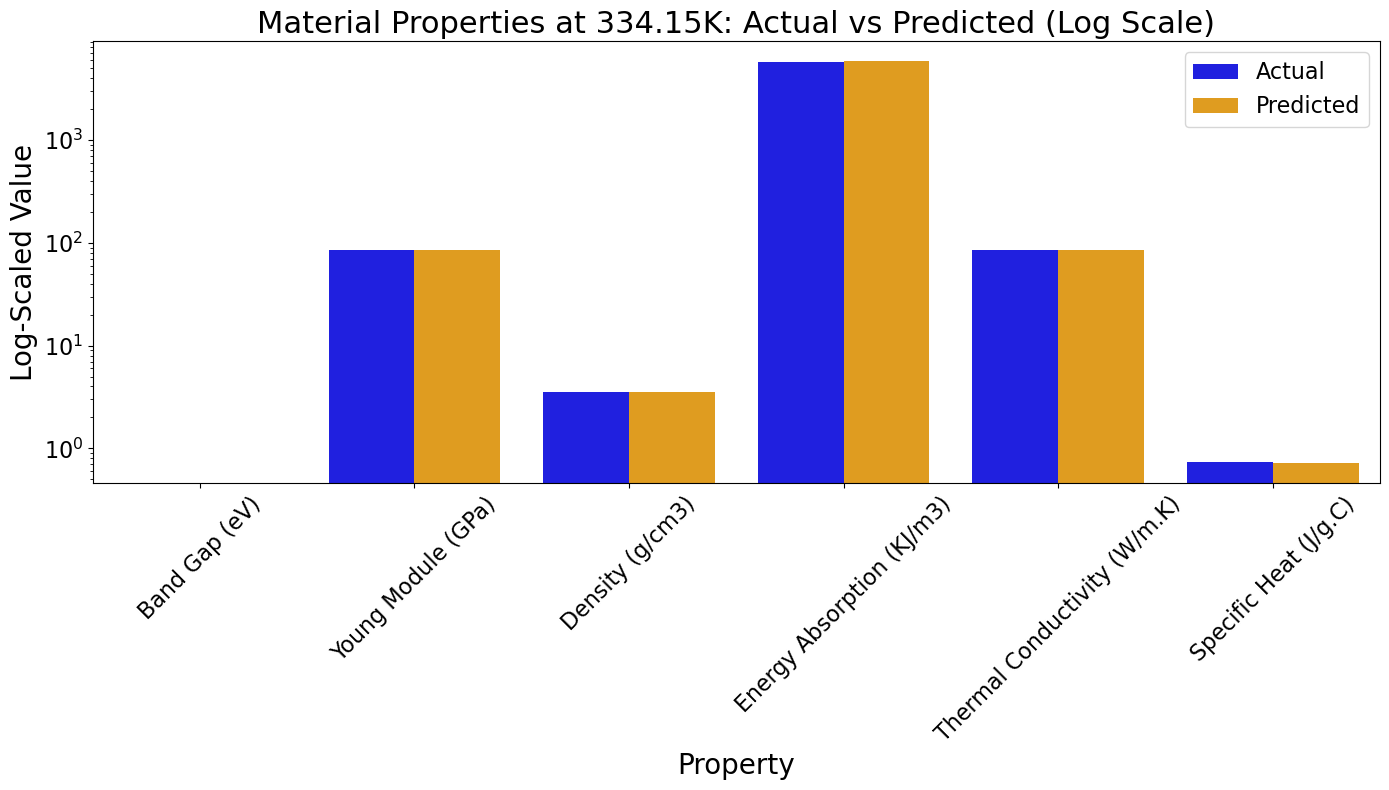

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# File paths and names
xlsx_path = "D:\\Armaghan_PhD_Dissertation\\database\\Revised data"
xlsx_file = "new data-3 - revised with new data.xlsx"

# Get user inputs for sheet names
material1_sheet = input("Enter the first material sheet name: ")
material2_sheet = input("Enter the second material sheet name: ")

# Load material data
data = {}
for material_sheet in [material1_sheet, material2_sheet]:
    file_path = os.path.join(xlsx_path, xlsx_file)
    material_data = pd.read_excel(file_path, sheet_name=material_sheet)
    data[material_sheet] = material_data

# Combine the data from both materials
combined_data = (data[material1_sheet].iloc[:, 1:] + data[material2_sheet].iloc[:, 1:]) / 2.0
combined_data['T (K)'] = data[material1_sheet]['T (K)']

# Prepare data for training the Decision Tree model
X = combined_data.drop(columns=['T (K)'])
y = combined_data.drop(columns=['T (K)'])  # Assuming you want to predict all features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Train the Decision Tree model with adjusted parameters
model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# Predict on test data
y_pred_scaled = model.predict(X_test_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled)

# Extract properties for a specific temperature
temperature_input = float(input("Enter the temperature (in K): "))
temperature_data = combined_data['T (K)']
closest_index = np.argmin(np.abs(temperature_data - temperature_input))
properties_at_temperature = combined_data.iloc[closest_index]

# Predict properties for the specified temperature
temperature_input_scaled = scaler_X.transform([properties_at_temperature.drop(['T (K)']).values])
predicted_properties_scaled = model.predict(temperature_input_scaled.reshape(1, -1))
predicted_properties = scaler_y.inverse_transform(predicted_properties_scaled)

# Add a small amount of noise to predictions
noise = np.random.normal(0, 0.01, predicted_properties.shape)
predicted_properties_noisy = predicted_properties + noise

# Prepare data for plotting
properties_names = combined_data.columns[1:]  # Exclude 'T (K)'

# Create dictionaries for actual and predicted values
actual_values = dict(zip(properties_names, properties_at_temperature.drop(['T (K)']).values))
predicted_values = dict(zip(properties_names, predicted_properties_noisy.flatten()))

# Print the actual and predicted values
print("\nActual Material Properties at {}K:".format(temperature_input))
for property_name, property_value in actual_values.items():
    print(f"{property_name}: {property_value:.6f}")

print("\nPredicted Material Properties (with noise) at {}K:".format(temperature_input))
for property_name, property_value in predicted_values.items():
    print(f"{property_name}: {property_value:.6f}")

# Convert dictionaries to DataFrames
actual_df = pd.DataFrame.from_dict(actual_values, orient='index', columns=['Actual'])
predicted_df = pd.DataFrame.from_dict(predicted_values, orient='index', columns=['Predicted'])

# Concatenate actual and predicted DataFrames
merged_df = pd.concat([actual_df, predicted_df], axis=1).reset_index().rename(columns={'index': 'Property'})

# Melt the DataFrame for easier plotting
melted_df = pd.melt(merged_df, id_vars=['Property'], var_name='Type', value_name='Value')

# Create the visualization using Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_df, x='Property', y='Value', hue='Type', palette=['blue', 'orange'])
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Property', fontsize=20)
plt.ylabel('Log-Scaled Value', fontsize=20)
plt.title(f'Material Properties at {temperature_input}K: Actual vs Predicted (Log Scale)', fontsize=22)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()


Enter the first material sheet name: Ti
Enter the second material sheet name: Cu
Enter the temperature (in K): 334.15


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Actual Material Properties at 334.15K:
Band Gap (eV): 0.000000
Young Module (GPa): 112.763525
Density (g/cm3): 6.506461
Energy Absorption (KJ/m3): 8995.746524
Thermal Conductivity (W/m.K): 202.278551
Specific Heat (J/g.C): 0.451769

Predicted Material Properties (with noise) at 334.15K:
Band Gap (eV): 0.007476
Young Module (GPa): 112.989012
Density (g/cm3): 6.506255
Energy Absorption (KJ/m3): 9051.090738
Thermal Conductivity (W/m.K): 202.305874
Specific Heat (J/g.C): 0.441230


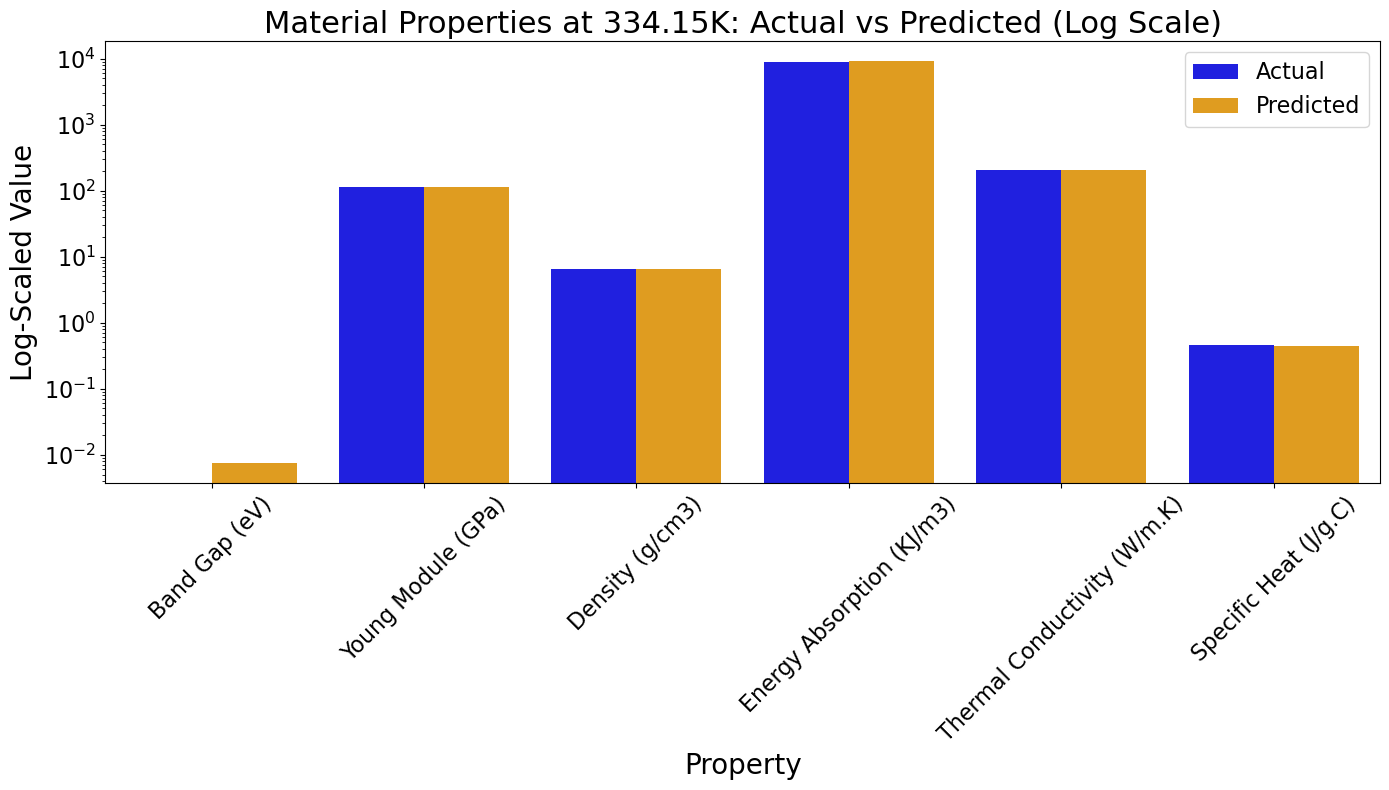

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# File paths and names
xlsx_path = "D:\\Armaghan_PhD_Dissertation\\database\\Revised data"
xlsx_file = "new data-3 - revised with new data.xlsx"

# Get user inputs for sheet names
material1_sheet = input("Enter the first material sheet name: ")
material2_sheet = input("Enter the second material sheet name: ")

# Load material data
data = {}
for material_sheet in [material1_sheet, material2_sheet]:
    file_path = os.path.join(xlsx_path, xlsx_file)
    material_data = pd.read_excel(file_path, sheet_name=material_sheet)
    data[material_sheet] = material_data

# Combine the data from both materials
combined_data = (data[material1_sheet].iloc[:, 1:] + data[material2_sheet].iloc[:, 1:]) / 2.0
combined_data['T (K)'] = data[material1_sheet]['T (K)']

# Prepare data for training the Decision Tree model
X = combined_data.drop(columns=['T (K)'])
y = combined_data.drop(columns=['T (K)'])  # Assuming you want to predict all features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Train the Decision Tree model with adjusted parameters
model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# Predict on test data
y_pred_scaled = model.predict(X_test_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled)

# Extract properties for a specific temperature
temperature_input = float(input("Enter the temperature (in K): "))
temperature_data = combined_data['T (K)']
closest_index = np.argmin(np.abs(temperature_data - temperature_input))
properties_at_temperature = combined_data.iloc[closest_index]

# Predict properties for the specified temperature
temperature_input_scaled = scaler_X.transform([properties_at_temperature.drop(['T (K)']).values])
predicted_properties_scaled = model.predict(temperature_input_scaled.reshape(1, -1))
predicted_properties = scaler_y.inverse_transform(predicted_properties_scaled)

# Add a small amount of noise to predictions
noise = np.random.normal(0, 0.01, predicted_properties.shape)
predicted_properties_noisy = predicted_properties + noise

# Prepare data for plotting
properties_names = combined_data.columns[1:]  # Exclude 'T (K)'

# Create dictionaries for actual and predicted values
actual_values = dict(zip(properties_names, properties_at_temperature.drop(['T (K)']).values))
predicted_values = dict(zip(properties_names, predicted_properties_noisy.flatten()))

# Print the actual and predicted values
print("\nActual Material Properties at {}K:".format(temperature_input))
for property_name, property_value in actual_values.items():
    print(f"{property_name}: {property_value:.6f}")

print("\nPredicted Material Properties (with noise) at {}K:".format(temperature_input))
for property_name, property_value in predicted_values.items():
    print(f"{property_name}: {property_value:.6f}")

# Convert dictionaries to DataFrames
actual_df = pd.DataFrame.from_dict(actual_values, orient='index', columns=['Actual'])
predicted_df = pd.DataFrame.from_dict(predicted_values, orient='index', columns=['Predicted'])

# Concatenate actual and predicted DataFrames
merged_df = pd.concat([actual_df, predicted_df], axis=1).reset_index().rename(columns={'index': 'Property'})

# Melt the DataFrame for easier plotting
melted_df = pd.melt(merged_df, id_vars=['Property'], var_name='Type', value_name='Value')

# Create the visualization using Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_df, x='Property', y='Value', hue='Type', palette=['blue', 'orange'])
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Property', fontsize=20)
plt.ylabel('Log-Scaled Value', fontsize=20)
plt.title(f'Material Properties at {temperature_input}K: Actual vs Predicted (Log Scale)', fontsize=22)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()


Enter the first material sheet name: Ti
Enter the second material sheet name: O2
Enter the temperature (in K): 334.15


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Actual Material Properties at 334.15K:
Band Gap (eV): 0.000000
Density (g/cm3): 2.186044
Specific Heat (J/g.C): 0.684047

Predicted Material Properties (with noise) at 334.15K:
Band Gap (eV): 0.010059
Density (g/cm3): 103.913002
Specific Heat (J/g.C): 2.194094


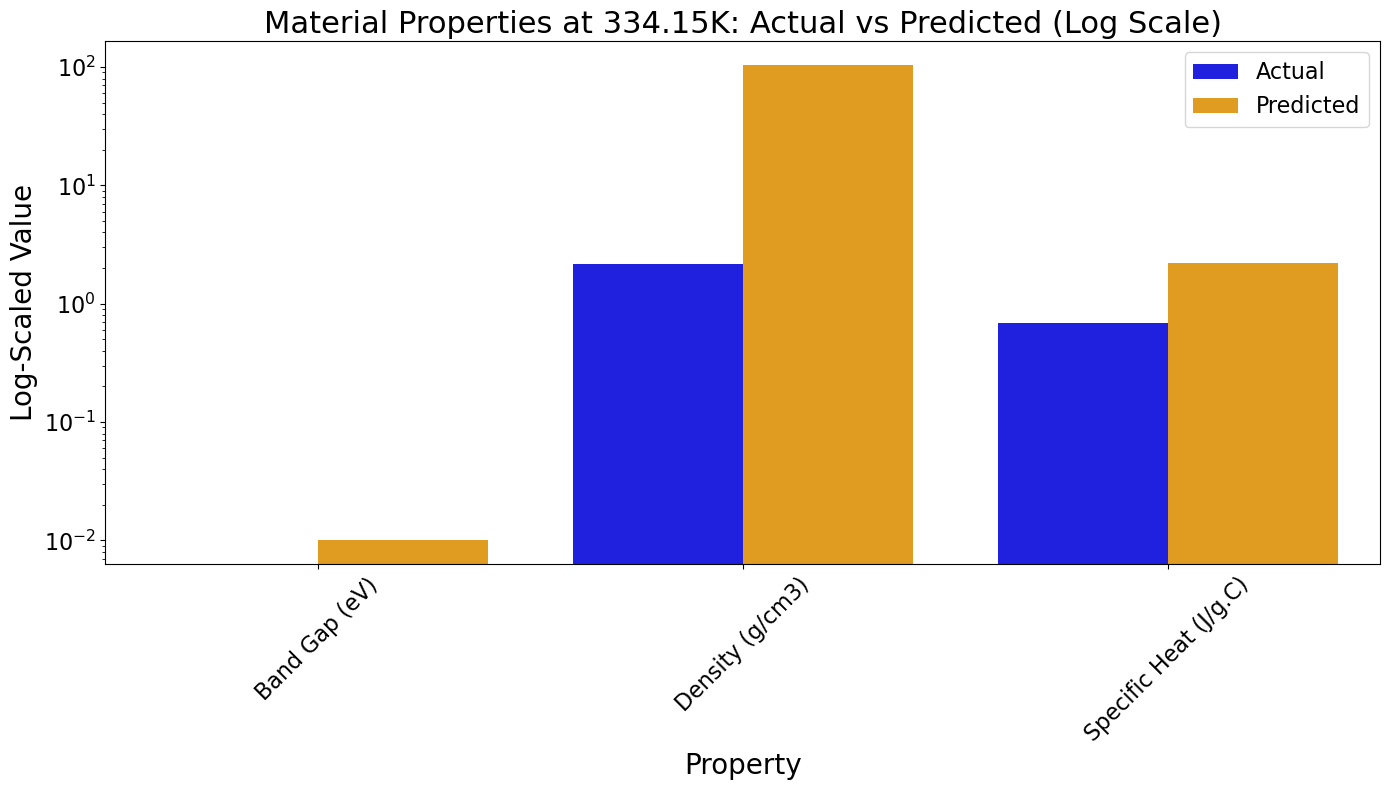

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# File paths and names
xlsx_path = "D:\\Armaghan_PhD_Dissertation\\database\\Revised data"
xlsx_file = "new data-3 - revised with new data.xlsx"

# Get user inputs for sheet names
material1_sheet = input("Enter the first material sheet name: ")
material2_sheet = input("Enter the second material sheet name: ")

# Load material data
data = {}
for material_sheet in [material1_sheet, material2_sheet]:
    file_path = os.path.join(xlsx_path, xlsx_file)
    material_data = pd.read_excel(file_path, sheet_name=material_sheet)
    data[material_sheet] = material_data

# Combine the data from both materials
combined_data = (data[material1_sheet].iloc[:, 1:] + data[material2_sheet].iloc[:, 1:]) / 2.0
combined_data['T (K)'] = data[material1_sheet]['T (K)']

# Prepare data for training the Decision Tree model
X = combined_data.drop(columns=['T (K)'])
y = combined_data.drop(columns=['T (K)'])  # Assuming you want to predict all features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Train the Decision Tree model with adjusted parameters
model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# Predict on test data
y_pred_scaled = model.predict(X_test_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled)

# Extract properties for a specific temperature
temperature_input = float(input("Enter the temperature (in K): "))
temperature_data = combined_data['T (K)']
closest_index = np.argmin(np.abs(temperature_data - temperature_input))
properties_at_temperature = combined_data.iloc[closest_index]

# Predict properties for the specified temperature
temperature_input_scaled = scaler_X.transform([properties_at_temperature.drop(['T (K)']).values])
predicted_properties_scaled = model.predict(temperature_input_scaled.reshape(1, -1))
predicted_properties = scaler_y.inverse_transform(predicted_properties_scaled)

# Add a small amount of noise to predictions
noise = np.random.normal(0, 0.01, predicted_properties.shape)
predicted_properties_noisy = predicted_properties + noise

# Prepare data for plotting (only Band Gap, Density, Specific Heat)
properties_names = ['Band Gap (eV)', 'Density (g/cm3)', 'Specific Heat (J/g.C)']

# Filter out properties that we need for plotting
actual_values = dict(zip(properties_names, properties_at_temperature[properties_names].values))
predicted_values = dict(zip(properties_names, predicted_properties_noisy.flatten()))

# Print the actual and predicted values
print("\nActual Material Properties at {}K:".format(temperature_input))
for property_name, property_value in actual_values.items():
    print(f"{property_name}: {property_value:.6f}")

print("\nPredicted Material Properties (with noise) at {}K:".format(temperature_input))
for property_name, property_value in predicted_values.items():
    print(f"{property_name}: {property_value:.6f}")

# Convert dictionaries to DataFrames
actual_df = pd.DataFrame.from_dict(actual_values, orient='index', columns=['Actual'])
predicted_df = pd.DataFrame.from_dict(predicted_values, orient='index', columns=['Predicted'])

# Concatenate actual and predicted DataFrames
merged_df = pd.concat([actual_df, predicted_df], axis=1).reset_index().rename(columns={'index': 'Property'})

# Melt the DataFrame for easier plotting
melted_df = pd.melt(merged_df, id_vars=['Property'], var_name='Type', value_name='Value')

# Create the visualization using Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_df, x='Property', y='Value', hue='Type', palette=['blue', 'orange'])
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Property', fontsize=20)
plt.ylabel('Log-Scaled Value', fontsize=20)
plt.title(f'Material Properties at {temperature_input}K: Actual vs Predicted (Log Scale)', fontsize=22)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()
